In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

In [6]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(data=scaled_data, columns=df_market_data.columns)

# Copy the crypto names from the original data
df_scaled['crypto_name'] = df_market_data.index
# Set the coinid column as index
df_scaled.set_index('crypto_name', inplace=True)

# Display sample data
df_scaled.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
crypto_name,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
import matplotlib.pyplot as plt
k_values = list(range(1, 12))

In [8]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=1)

    # Fit the model to the data using df_scaled
    model.fit(df_scaled)

    # Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)

C:\Users\edmon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\edmon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\edmon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\edmon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

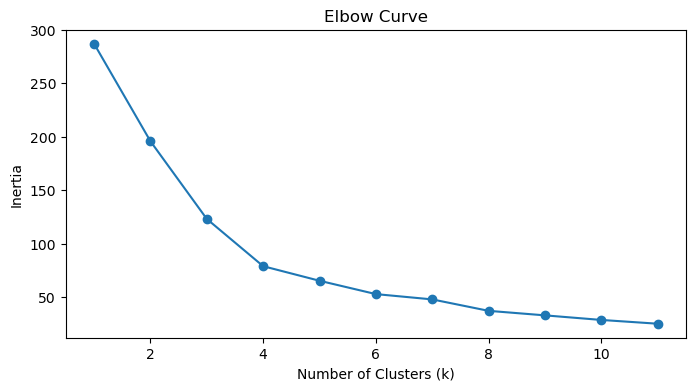

In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 4))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

#### ---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [27]:
# Initialize the K-Means model using the best value for k
k_best = 4
kmeans_model = KMeans(n_clusters=k_best, random_state=1)


In [28]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_scaled)

C:\Users\edmon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\edmon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [29]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_model.predict(df_scaled)

# Print the resulting array of cluster values.
print(cluster_labels)

[3 3 1 1 3 3 3 3 3 1 1 1 1 3 1 3 1 1 3 1 1 3 1 1 1 1 1 1 3 1 1 1 0 3 1 1 2
 1 1 1 1]


In [30]:
# Create a copy of the DataFrame
df_clusters = df_scaled.copy()

In [31]:
# Add a new column to the DataFrame with the predicted clusters
df_clusters["crypto_cluster"] = cluster_labels

# Display sample data
df_clusters.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
crypto_name,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,3
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,3
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,3
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,3


In [32]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_clusters.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="crypto_cluster",  # Color by cluster labels
    hover_cols=["crypto_name"],  # Show crypto names on hover
    title="Crypto Clusters"
)
scatter_plot

:NdOverlay   [crypto_cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,crypto_name)

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [18]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=pca_data, columns=["PC1", "PC2", "PC3"], index=df_scaled.index)
# View the first five rows of the DataFrame. 
df_pca.head()

,PC1,PC2,PC3
crypto_name,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [19]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.89503184

In [20]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data
df_pca_final = df_pca.copy()

# Copy the crypto names from the original data
df_pca_final['crypto_name'] = df_market_data.index

# Set the coinid column as index
df_pca_final.set_index('crypto_name', inplace=True)

# Display sample data
df_pca_final.head()

,PC1,PC2,PC3
crypto_name,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [22]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=1)

    # Fit the model to the data using df_market_data_pca
    model.fit(df_pca)

    # Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)



C:\Users\edmon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\edmon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\edmon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\edmon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [25]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

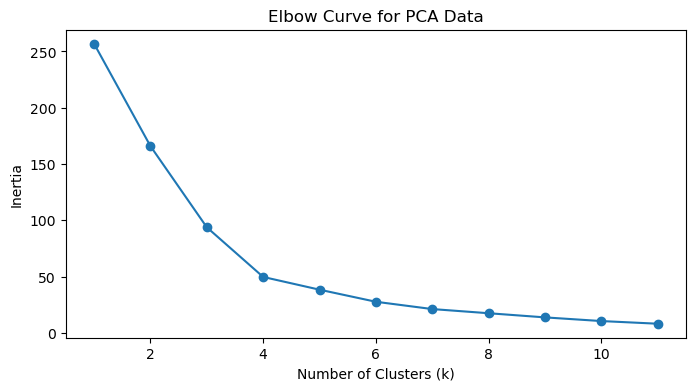

In [26]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 4))
plt.plot(df_elbow_pca["k"], df_elbow_pca["inertia"], marker='o', linestyle='-')
plt.title('Elbow Curve for PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** NO

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
# Initialize the K-Means model using the best value for k
k_best_pca = 4
model_pca = KMeans(n_clusters=k_best_pca, random_state=1)

In [26]:
# Fit the K-Means model using the PCA data
model_pca.fit(df_pca)

In [27]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels = model_pca.predict(df_pca)

# Print the resulting array of cluster values
print(cluster_labels)

In [28]:
# Create a copy of the DataFrame with the PCA data
df_pca_clusters = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_clusters['Cluster'] = cluster_labels

# Display sample data
df_pca_clusters.head()

In [29]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_pca_clusters.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="Cluster",
    colormap='viridis',
    title="Clustered Cryptocurrencies"
)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [30]:
# Composite plot to contrast the Elbow curves
import holoviews as hv
from holoviews import opts

# Elbow curve plot
elbow_curve = df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title='Elbow Curve',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    width=500,
    height=300,
    show_legend=False
).opts(color='blue')


In [31]:
# Composite plot to contrast the clusters
# Cluster plot
cluster_plot = df_pca_clusters.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="Cluster",
    colormap='viridis',
    title="Clustered Cryptocurrencies",
    width=500,
    height=300
).opts(colorbar=True)

# Create a composite plot
composite_plot = (elbow_curve + cluster_plot).cols(1)

# Display the composite plot
composite_plot

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features for clustering simplifies the analysis, making it easier to understand. However, this simplification may result in some loss of detail and complexity in the clusters.